# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime 


print('Выводим для ознакомления первые десять строк таблицы: ')
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

print(data.head( 10))


Выводим для ознакомления первые десять строк таблицы: 
   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0        51.00      8          NaN  ...   
1             NaN

In [2]:
print('Выводим общую информацию о файле:  ')
data.info()

print('  ')
print('Далее выводим информацию о количестве пропусков в данных:')
print(data.isna().sum())


print('')



print('  ')
print('Теперь методом describe выводим оценочную информацию о значениях в столбцах с числовыми типами данных, округляем до сотых:')
data.describe().round(2)

Выводим общую информацию о файле:  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-nu

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,2.369900e+04,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6.541549e+06,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,1.088701e+07,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,1.219000e+04,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3.400000e+06,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4.650000e+06,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6.800000e+06,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,7.630000e+08,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


### Вывод

В файле имеется значительное количество пропусков. Для дальнейшей работы нужно заполнить эти пропуски и обработать аномальные значения. Но к каждому столбцу нужно подходить индивидуально.

<i>ceiling_height</i> - на место пропусков решено подставить медианное значение по таблице, а так же им же заменить аномальные значения( например, высоту потолков в 1 метр или 100 метров). 

<i>floors_total</i>  - общее количество этажей в здании - относительно небольшое число пропусков, логично заполнить средним количеством. Наибольшим количеством указанных этажей является 60, в принципе, это можно допустить. Существенных аномалий не выявлено.

<i>living_area, kitchen_area</i>  - достаточное количество пропусков. Но сложность их заполнения - зависимость от общей площади конкретной квартиры. Я попробую посчитать с помощью модели линейной регрессии зависимость жилой площади от общей и затем на место пропусков подставлю предполагаемую жилую площадь исходя из результата уравнения. Площадь кухни вычислим по тому же принципу, что и жилую площадь. Так же, в квартирах-студиях кухню не выделяют, логично в строках со студиями указать площадь кухни как нулевую.

<i>is_apartment</i>  - данные о том, оформлена ли квартира как апартаменты(т е не совсем жилое помещение, скажем так). Логично предположить, что данное поле заполняли только владельцы апартаментов, владельцы же квартир его просто пропускали.        
balcony  - вероятно, наличие пропуска в этом столбце значит отсутствие балкона в квартире. Аномальных значений не обнаруживается. 

<i>locality_name</i>  - можно предположить, что квартиры с пропуском значений в этом пункте находятся в черте города. Но следует проверить это, узнав, входят ли они по расположению в теоретически возможный радиус города по удаленности их от центра. 

<i>airports_nearest, cityCenters_nearest</i>   - логично предположить, что расстояние до аэропорта и центра города от этих квартир было настолько велико, что не входило в расчитываемый радиус и просто игнорировалось. Та же логика и с <i><i>parks_around3000, parks_nearest, ponds_around3000, ponds_nearest</i> . Но здесь, скорее всего, брали меньшее максимально учитываемое расстояние, чем с аэропортом и центром, т к парки достаточно распространены и менее "уникальные" объекты. 
    
<i>days_exposition</i> - пропуски данных в данном столбце можно связать с тем, что объявление, возможно, не было закрыто, либо было открыто очень короткий срок, либо произошла некая програмная ошибка. Логично заменить пропуски на медианное значение.

## Предобработка данных

**ceiling_height**

In [3]:
print('Смотрим на уникальные значения высоты потолков в квартирах:')
print(data['ceiling_height'].value_counts() )     #unique())
print('Получаем довольно широкий разброс с преобладанием "стандартных высот", но так же встречаются аномальные значения, например, 1м или 100м и 10м.')
print('Такие значения крайне маловероятны в реальности, поэтому я решила заменить как слишком низкие, так и слишком высокие значения на цифры, приближенные к квадрилям, полученым методом describe, и опирающиеся на реалистичные "непопулярные"  значения, полученные методом value_counts.  ')
print('  ')
print('Выводим статистические данные методом describe: ')
print(data['ceiling_height'].describe())
print('  ')
print('Заполняем пропуски.')
data['ceiling_height'] = data['ceiling_height'].where(~((data['ceiling_height'].isnull()) | (data['ceiling_height'] <2.0) | (data['ceiling_height'] >4.0)), 2.5)
print(data['ceiling_height'].describe())
print('Для проверки выводим количество пропусков в исправленном столбце:', data['ceiling_height'].isna().sum())
print('Выводим данные методом describe: ')
print(data['ceiling_height'].describe())

Смотрим на уникальные значения высоты потолков в квартирах:
2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64
Получаем довольно широкий разброс с преобладанием "стандартных высот", но так же встречаются аномальные значения, например, 1м или 100м и 10м.
Такие значения крайне маловероятны в реальности, поэтому я решила заменить как слишком низкие, так и слишком высокие значения на цифры, приближенные к квадрилям, полученым методом describe, и опирающиеся на реалистичные "непопулярные"  значения, полученные методом value_counts.  
  
Выводим статистические данные методом describe: 
count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64
  
Заполняем пропуски.
count    23699.000000
mean

**floors_total**

In [4]:
print('Методом value_counts смотрим на уникальные значения в столбце:  ')
print(data['floors_total'].value_counts())

print('Выходит, что аномально многоэтажных домов единицы, так что можно допустить их существование.')
print('Далее заполняем пропуски средним значением, округленном до целого числа: ',  data["floors_total"].mean().round())
data['floors_total']= data['floors_total'].fillna(value=data["floors_total"].mean().round())
print('Для проверки выводим количество пропусков в исправленном столбце:', data["floors_total"].isna().sum())

Методом value_counts смотрим на уникальные значения в столбце:  
5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64
Выходит, что аномально многоэтажных домов единицы, так что можно допустить их существование.
Далее заполняем пропуски средним значением, округленном до целого числа:  11.0
Для проверки выводим количество пропусков в исправленном столбце: 0


**living_area, kitchen_area**

In [5]:
print('Сначала поработаем со столбцом со значением жилой площади. В столбцах с общей площадью и количеством комнат пропуски отстутствуют.  ')
print('Выведем данные по методу describe:  ')
print(data['total_area'].describe())
print('Допустим, минимальное значение - некая реальная микро-студия, а максимальное - некий элитный особняк. Т е аномальных значений нет. ')
print('Я решила попробовать оценить зависимость жилой площади от общей площади недвижимости с помощью линейной регрессии.')

print('Минимизируем квадратичную функцию ошибки по формуле error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2')
print('где   n  – число наблюдений в наборе данных living_area_all,  yi  и  xi  – жилая и общая площадь  i -ого объекта недвижимости в наборе данных.')




from scipy.optimize import minimize

print('Сначала очистим данные от пропущенных значений')
living_area_all = data[data['living_area'].notna()].reset_index(drop=True)

print('Зададим квадратичную функцию ошибки, зависящую от вектора параметров.')
def error_function(w):
    sum = 0
    for i in range(len(living_area_all)):
        sum += (living_area_all.loc[i, 'living_area'] - (w[0] + w[1] * living_area_all.loc[i, 'total_area'])) ** 2
    return sum



Сначала поработаем со столбцом со значением жилой площади. В столбцах с общей площадью и количеством комнат пропуски отстутствуют.  
Выведем данные по методу describe:  
count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64
Допустим, минимальное значение - некая реальная микро-студия, а максимальное - некий элитный особняк. Т е аномальных значений нет. 
Я решила попробовать оценить зависимость жилой площади от общей площади недвижимости с помощью линейной регрессии.
Минимизируем квадратичную функцию ошибки по формуле error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2
где   n  – число наблюдений в наборе данных living_area_all,  yi  и  xi  – жилая и общая площадь  i -ого объекта недвижимости в наборе данных.
Сначала очистим данные от пропущенных значений
Зададим квадратичную функцию ошибки, зависящую от вектора параметров.


Решим задачу минимизации заданной функциию и зададим линейную функцию, отображающую наше решение. Затем изобразим решение на графике.


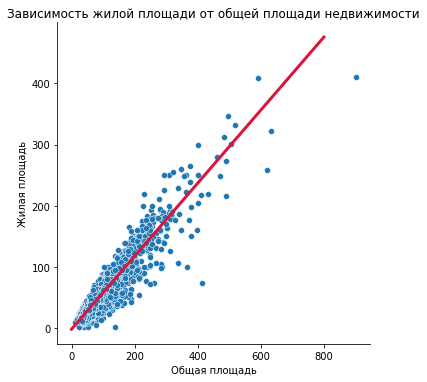

In [6]:
print('Решим задачу минимизации заданной функциию и зададим линейную функцию, отображающую наше решение. Затем изобразим решение на графике.')
result = minimize(error_function, np.array([0, 0]))

def linear_function(w0, w1, x):
    return (w0 + w1 * x)

sns.relplot(x='total_area', y='living_area', data=data)

total_area = np.linspace(0, 800)
line = plt.plot(total_area, linear_function(result.x[0], result.x[1], total_area), color='crimson', linewidth=3)
plt.title('Зависимость жилой площади от общей площади недвижимости')
plt.xlabel('Общая площадь')
plt.ylabel('Жилая площадь')
plt.show()

In [7]:
print('Далее заменим все пропущенные значения на основе оцененной зависимости.')
data.loc[data['living_area'].isna(), 
         'living_area'] = result.x[0] + result.x[1] * data.loc[data['living_area'].isna(), 'total_area']


print('Количество пропущенных значений после обработки: ', data['living_area'].isna().sum())



Далее заменим все пропущенные значения на основе оцененной зависимости.
Количество пропущенных значений после обработки:  0


Этим же методом вычисляем площадь кухни.
  
Изобразим решение на графике:


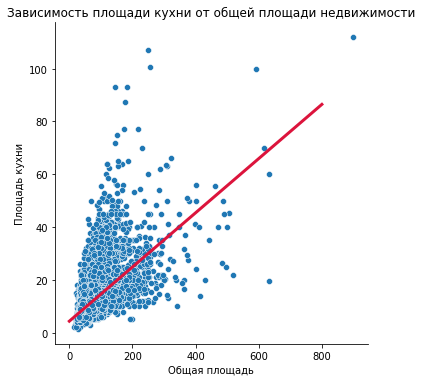

Так как имеются квартиры-студии, в которых площадь кухни отдельно не выделяется, заменяем в соответствующих им строках пропуски на нули.
Проверяем: 0


In [8]:
print('Этим же методом вычисляем площадь кухни.')
kitchen_area_all = data[data['kitchen_area'].notna()].reset_index(drop=True)
print('  ')
def error_function(w):
    sum = 0
    for i in range(len(kitchen_area_all)):
        sum += (kitchen_area_all.loc[i, 'kitchen_area'] - (w[0] + w[1] * kitchen_area_all.loc[i, 'total_area'])) ** 2
    return sum

result = minimize(error_function, np.array([0, 0]))

print('Изобразим решение на графике:')
sns.relplot(x='total_area', y='kitchen_area', data=data)

total_area = np.linspace(0, 800)
line = plt.plot(total_area, linear_function(result.x[0], result.x[1], total_area), color='crimson', linewidth=3)
plt.title('Зависимость площади кухни от общей площади недвижимости')
plt.xlabel('Общая площадь')
plt.ylabel('Площадь кухни')
plt.show()

print('Так как имеются квартиры-студии, в которых площадь кухни отдельно не выделяется, заменяем в соответствующих им строках пропуски на нули.')
data.loc[data['studio'] == True, 'kitchen_area'] = 0
data.loc[data['kitchen_area'].isna(), 
         'kitchen_area'] = result.x[0] + result.x[1] * data.loc[data['kitchen_area'].isna(), 'total_area']


print('Проверяем:', data['kitchen_area'].isna().sum())

**balcony**

In [9]:
print('В столбце с балконами не указано их количество у ', data['balcony'].isna().sum(), ' квартир')
print('Логично предположить, что в данных квартирах балконы отсутствуют и пропуски можно заменить на 0 методом fillna.')

data['balcony'].fillna(0, inplace=True)
print('Количество пропусков после обработки:', data['balcony'].isna().sum() )

В столбце с балконами не указано их количество у  11519  квартир
Логично предположить, что в данных квартирах балконы отсутствуют и пропуски можно заменить на 0 методом fillna.
Количество пропусков после обработки: 0


**locality_name**

In [10]:
print('Количество пропусков в столбце с названием населенного пункта, где расположена квартира: ', data['locality_name'].isna().sum())
print(' Логично предположить, что пропуски возникли в связи с тем, что продавец не счел нужным заполнить графу, т к подразумевал, что расположение будет очевидно. Т е предполагается самый большой город ЛО - Санкт-Петербург. ')
print('Методом fillna заменим пропуски на название города. Это может не соответствовать действительности, но пропусков достаточно небольшое количество, чтобы ошибочное предположение существенно  влияло на результаты исследования')

data['locality_name'].fillna('Санкт-Петербург', inplace=True)
print('Количество пропусков после обработки:', data['locality_name'].isna().sum() )

Количество пропусков в столбце с названием населенного пункта, где расположена квартира:  49
 Логично предположить, что пропуски возникли в связи с тем, что продавец не счел нужным заполнить графу, т к подразумевал, что расположение будет очевидно. Т е предполагается самый большой город ЛО - Санкт-Петербург. 
Методом fillna заменим пропуски на название города. Это может не соответствовать действительности, но пропусков достаточно небольшое количество, чтобы ошибочное предположение существенно  влияло на результаты исследования
Количество пропусков после обработки: 0


**cityCenters_nearest**

In [11]:
print('Количество пропусков в столбце с удаленностью от центра:',  data['cityCenters_nearest'].isna().sum())
print('Для работы в дальнейшем будет важно только расстояние до центра города Санкт-Петербурга. ')
print('Вычисляем количество пропусков в строках с питербургскими квартирами: ')
round(len(data[(data['locality_name'] == 'Санкт-Петербург') & (data['cityCenters_nearest'].isna())]) / len(data.reset_index(drop=True).query('locality_name == "Санкт-Петербург"')), 3)

print('исходя из полученного коэфициента, допустимо заменить имеющиеся пропуски на нулевое значение.')
data['cityCenters_nearest'].fillna(0, inplace=True)
print( 'Проверяем:', data['cityCenters_nearest'].isna().sum())

Количество пропусков в столбце с удаленностью от центра: 5519
Для работы в дальнейшем будет важно только расстояние до центра города Санкт-Петербурга. 
Вычисляем количество пропусков в строках с питербургскими квартирами: 
исходя из полученного коэфициента, допустимо заменить имеющиеся пропуски на нулевое значение.
Проверяем: 0


**is_apartment**

In [12]:
print('Как уже говорилось, предполагаем, что пропуски в графе "Апартаменты" - это отрицание этой характеристики жилплощади. ')
print('Количество пропусков:', data['is_apartment'].isna().sum(), 'Для проверки выводим значение заполненных положительных и отрицательных ответов:' )
print(data['is_apartment'].value_counts())
print('Получаем 50 апартаментов. Не совсем похоже на реальность, но каким-либо другим способом пропуски заполнить не получится.  ')
data['is_apartment'].fillna(False, inplace=True)
print('После заполнения пропусков отрицательными значениями проверяем:')
print(data['is_apartment'].value_counts())

Как уже говорилось, предполагаем, что пропуски в графе "Апартаменты" - это отрицание этой характеристики жилплощади. 
Количество пропусков: 20924 Для проверки выводим значение заполненных положительных и отрицательных ответов:
False    2725
True       50
Name: is_apartment, dtype: int64
Получаем 50 апартаментов. Не совсем похоже на реальность, но каким-либо другим способом пропуски заполнить не получится.  
После заполнения пропусков отрицательными значениями проверяем:
False    23649
True        50
Name: is_apartment, dtype: int64


**days_exposition**

In [13]:
print('Количество пропусков в столбце длительности размещения обьявления:', data['days_exposition'].isna().sum())
print('Заменим пропуски на медианные значения.')
data.loc[data['days_exposition'].isna(), 'days_exposition'] = data['days_exposition'].describe()[5]
print('Проверяем:', data['days_exposition'].isna().sum())

Количество пропусков в столбце длительности размещения обьявления: 3181
Заменим пропуски на медианные значения.
Проверяем: 0


**airports_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest**

In [14]:
print(' Как уже говорилось, решено заменить пропуски в этих столбцах на нулевые значения.')  

data['airports_nearest'].fillna(0, inplace=True)
data['parks_around3000'].fillna(0, inplace=True)
data['parks_nearest'].fillna(0, inplace=True)
data['ponds_around3000'].fillna(0, inplace=True)
data['ponds_nearest'].fillna(0, inplace=True)
print('Проверяем всю таблицу:  ')
print( data.isna().sum())



 Как уже говорилось, решено заменить пропуски в этих столбцах на нулевые значения.
Проверяем всю таблицу:  
total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64


## Изменение типа данных

In [15]:
print('Выведем информацию о типе данных в столбцах:  ')
data.info()

Выведем информацию о типе данных в столбцах:  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         2

Для большего удобства и аккуратности приводим столбцы:
last_price, floors_total, balcony, irports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition - в целочисленный тип;
total_area, ceiling_height, living_area, kitchen_area - округлим до 1го знака после запятой;
first_day_exposition - даты в datetime;



In [16]:
print('Воспользуемся функциями для перевода в целочисленные значения и округления до десятых. ')
column_to_int = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
               'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']

for column in column_to_int:
    data[column] = data[data[column].notnull()][column].astype('int')

    
column_to_round_1 = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area']

for column in column_to_round_1:
    data[column] = data[data[column].notnull()][column].round(1)

print('Затем заменим тип данных по дате публикации со строчного на datetime:')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

print('Проверяем: ')
data.info()
print(data.head())


Воспользуемся функциями для перевода в целочисленные значения и округления до десятых. 
Затем заменим тип данных по дате публикации со строчного на datetime:
Проверяем: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio              

## Расчёты и добавление результатов в таблицу

Цена квадратного метра:

In [17]:
data['price_per_sqm'] = round(data['last_price'] / data['total_area'], 1)

День недели, месяц и год публикации объявления:

In [18]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Этаж квартиры (первый, последний, другой):

In [19]:
data.loc[data['floor'] == 1, 'floor_category'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_category'] = 'последний'
data.loc[data['floor_category'].isna(), 'floor_category'] = 'другой'

Соотношение жилой и общей площади, а также отношение площади кухни к общей:

In [20]:
data['living_area_ratio'] = round(data['living_area'] / data['total_area'], 3)
data['kitchen_area_ratio'] = round(data['kitchen_area'] / data['total_area'], 3)

In [21]:
print('Проверяем:  ')
print(data.head(10))


Проверяем:  
   total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0           2019-03-07      3   
1             7     3350000        40.4           2018-12-04      1   
2            10     5196000        56.0           2015-08-20      2   
3             0    64900000       159.0           2015-07-24      3   
4             2    10000000       100.0           2018-06-19      2   
5            10     2890000        30.4           2018-09-10      1   
6             6     3700000        37.3           2017-11-02      1   
7             5     7915000        71.6           2019-04-18      2   
8            20     2900000        33.2           2018-05-23      1   
9            18     5400000        61.0           2017-02-26      3   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0             2.7            16         51.0      8         False  ...   
1             2.5            11         18.6      1      

## Исследовательский анализ данных

**Изучаем площадь, цену, число комнат и высоту потолков.**

In [22]:
data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,23699.000000
mean,60.348635,6.541549e+06,2.070636,2.637111
std,35.654086,1.088701e+07,1.078405,0.229700
min,12.000000,1.219000e+04,0.000000,2.000000
25%,40.000000,3.400000e+06,1.000000,2.500000
50%,52.000000,4.650000e+06,2.000000,2.500000
75%,69.900000,6.800000e+06,3.000000,2.700000
max,900.000000,7.630000e+08,19.000000,4.000000


<ul>Из полученных данных можно сделать следующие выводы:
<li> по площади есть как квартира 12 кв.м., так и 900 кв.м. Существует вероятность ошибочных данных, но это не проверить. Так как среднее значение и значение квартилей вполне реалистичны, игнорируем смущающие значения;</li>
<li>по цене за квартиру - так же есть варианты со странными значениями, но в среднем все адекватно;</li>
<li>число комнат - от 0 (студия) до 19. Исходя из разнообразия площадей, вполне допускается такое наличие комнат;</li>
<li>высота потолков - разброс был сужен в отрезке от 2 до 4 метров, как результат обработки и избавления от откровенно нереалистичных значений.</li>
<li>"усредненная квартира" - двухкомнатная, площадью 60 кв.м. с высотой потолков в 2.6 м ценой 6.5млн.</li>
<li>"медианная квартира" - двухкомнатная, площадью 52 кв.м. с потолками в 2.5 м стоимостью 4.65млн.</li>    
</ul>


In [23]:
print('Узнаем количество строк датафрейма для того, чтоб указать выборку при прорисовке статистических графиков:', len(data))

Узнаем количество строк датафрейма для того, чтоб указать выборку при прорисовке статистических графиков: 23699


**Визуализируем параметры**

Строим диаграммы размаха по каждому параметру:
Видно, что выбросы мешают оценке.


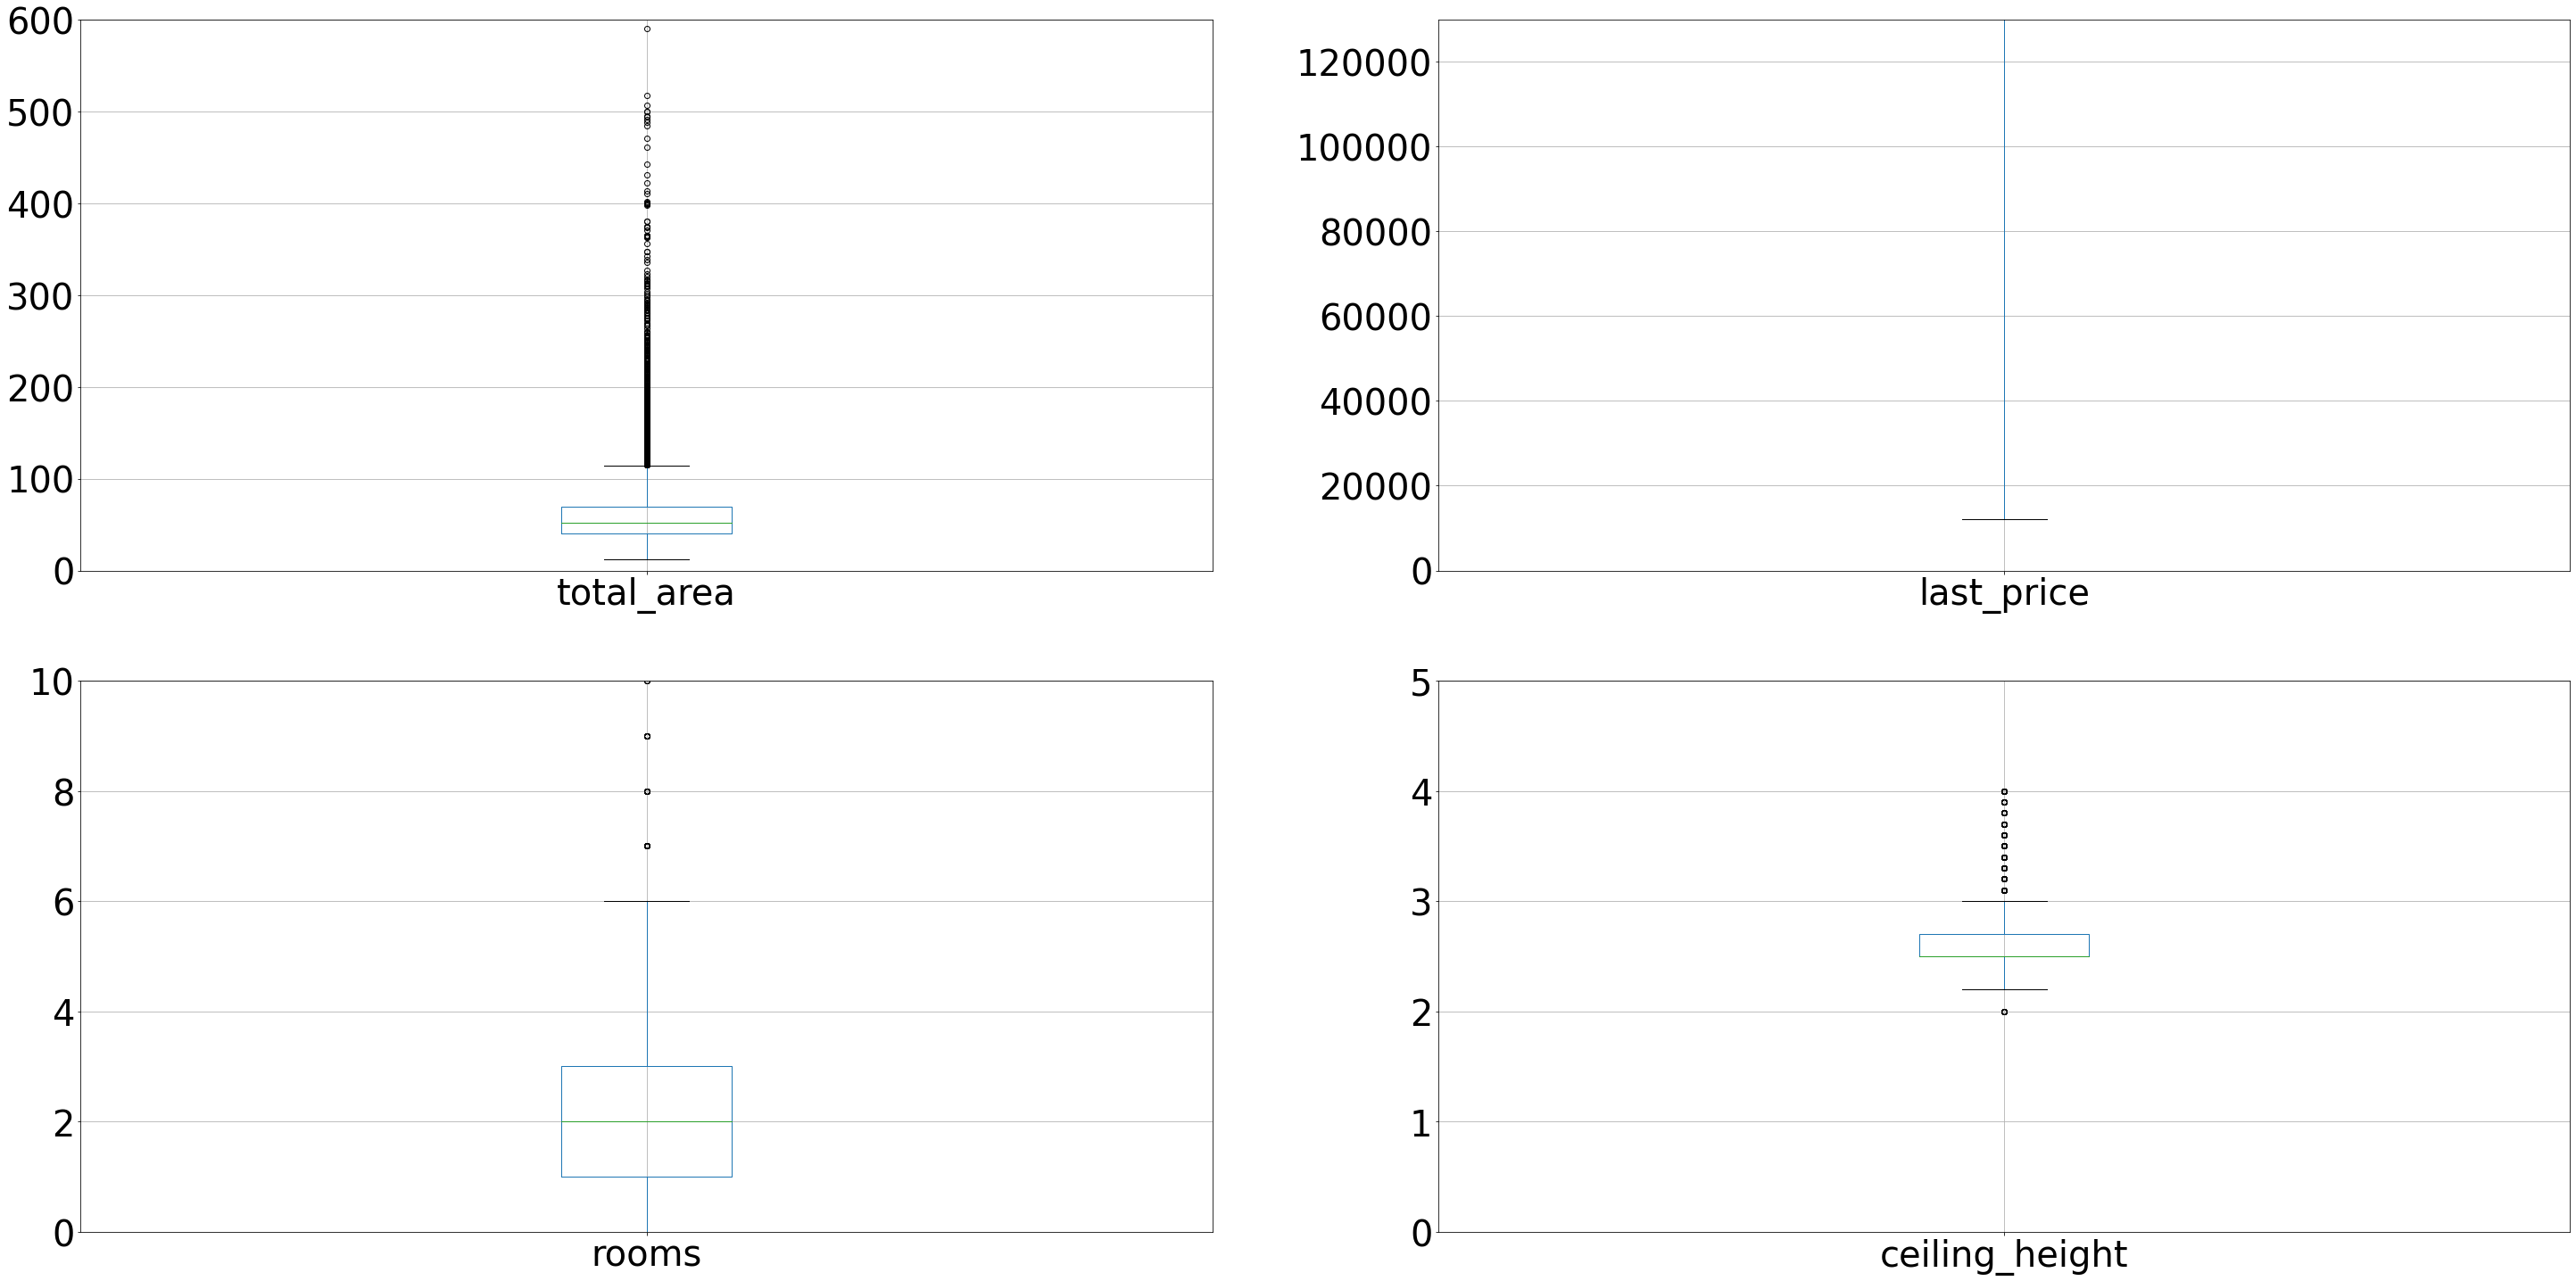

In [24]:
print('Строим диаграммы размаха по каждому параметру:')

rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(50,25))
column_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
ylims = [600, 130000, 10, 5]
count = 0
for r in range(rows):
    for c in range(cols):
        ax = data.boxplot(column=column_list[count], ax=axes[r,c], fontsize=40)
        ax.set_ylim([0, ylims[count]])
        count += 1
        
print('Видно, что выбросы мешают оценке.')

In [25]:
print('Строим функцию, возвращающую границы "усов" по заданному параметру. В дальнейшем будем ориентироваться на эти числа для ограничения диаграмм.')
def df_whiskers(column):
    stat = data[column].describe()
    
    # межквартирльный размах
    iqr = stat[6] - stat[4]
    
    # левый и правый "ус"    
    left_whisker = round(stat[4] - 1.5 * iqr, 2)
    right_whisker = round(stat[6] + 1.5 * iqr, 2)

    # левый "ус" не должен быть меньше минимального значения
    if left_whisker < stat[3]: left_whisker = stat[3] 
        
    # правый "ус" не должен быть больше максимального значения
    if right_whisker > stat[7]: right_whisker = stat[7]
        
    return [left_whisker, right_whisker]



def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq

list_features = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for col in list_features:
    data[col] = quartile_range(data, col)


data['rooms'] = data['rooms'].fillna(0).astype(int)

print('Избавляемся от выбросов с помощью функции для подсчёта границ с учетом 1.5 размаха. Затем возвращаем в целочисленный тип число комнат.')
print('Проверяем, есть ли выбивающиеся значения.')

data.describe()


Строим функцию, возвращающую границы "усов" по заданному параметру. В дальнейшем будем ориентироваться на эти числа для ограничения диаграмм.
Избавляемся от выбросов с помощью функции для подсчёта границ с учетом 1.5 размаха. Затем возвращаем в целочисленный тип число комнат.
Проверяем, есть ли выбивающиеся значения.


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday,month,year,living_area_ratio,kitchen_area_ratio
count,23699.000000,2.163800e+04,22459.000000,23699.000000,22304.000000,23699.000000,22807.000000,23699.000000,22382.000000,23699.000000,...,23699.000000,23699.000000,23699.000000,21364.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000
mean,9.858475,4.839970e+06,54.364892,2.013545,2.594136,10.675007,31.528956,5.892358,9.445572,0.591080,...,167.315499,0.590911,199.114140,113.181333,9.942170e+04,2.569307,6.400101,2017.367146,0.565104,0.187096
std,5.682529,2.217341e+06,19.385324,0.986846,0.143203,6.585221,13.790361,4.885249,3.123921,0.959298,...,306.709997,0.883999,305.188777,96.807439,5.030700e+04,1.789082,3.491561,1.039771,0.101112,0.072179
min,0.000000,1.219000e+04,12.000000,0.000000,2.200000,1.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.118000e+02,0.000000,1.000000,2014.000000,0.022000,0.000000
25%,6.000000,3.300000e+06,39.400000,1.000000,2.500000,5.000000,18.700000,2.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,45.000000,7.658740e+04,1.000000,3.000000,2017.000000,0.500000,0.136000
50%,9.000000,4.400000e+06,50.100000,2.000000,2.500000,9.000000,30.000000,4.000000,9.000000,0.000000,...,0.000000,0.000000,0.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.569000,0.175000
75%,14.000000,6.000000e+06,65.600000,3.000000,2.600000,16.000000,40.700000,8.000000,11.000000,1.000000,...,301.000000,1.000000,389.000000,147.000000,1.142623e+05,4.000000,10.000000,2018.000000,0.632000,0.230000
max,50.000000,1.189440e+07,114.600000,5.000000,3.000000,60.000000,76.900000,33.000000,19.000000,5.000000,...,3190.000000,3.000000,1344.000000,429.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.788000


**Площадь**

In [26]:
print(df_whiskers('total_area'))

data['total_area'].describe()


[12.0, 104.9]


count    22459.000000
mean        54.364892
std         19.385324
min         12.000000
25%         39.400000
50%         50.100000
75%         65.600000
max        114.600000
Name: total_area, dtype: float64

Построим диаграмму размаха, ограничив площадь 150 кв.м:


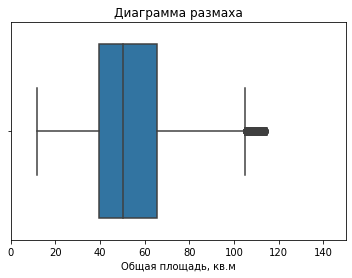

In [27]:
print('Построим диаграмму размаха, ограничив площадь 150 кв.м:')
sns.boxplot(x=data['total_area'])
plt.title('Диаграмма размаха')
plt.xlabel('Общая площадь, кв.м')
plt.xlim(0, 150)
plt.show()
print('  ')

Построим диаграмму для объектов с площадью менее 150 кв.м.


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


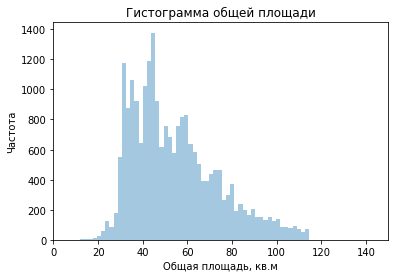

In [28]:
print('Построим диаграмму для объектов с площадью менее 150 кв.м.')
sns.distplot(x=data['total_area'], kde=False, bins=55)
plt.xlim(0, 150)
plt.title('Гистограмма общей площади')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Частота')
plt.show()

 Большая часть квартир имеет метраж от 30 до 90 кв.м., пик приходится на 40-50 кв.м. 

**Цена**

[12190.0, 10050000.0]


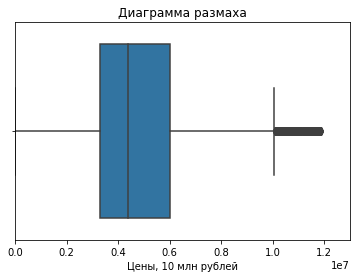

In [29]:
print(df_whiskers('last_price'))

data['last_price'].describe()

sns.boxplot(x=data['last_price'])
plt.title('Диаграмма размаха')
plt.xlabel('Цены, 10 млн рублей')
_ = plt.xlim(0, 13000000)




/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


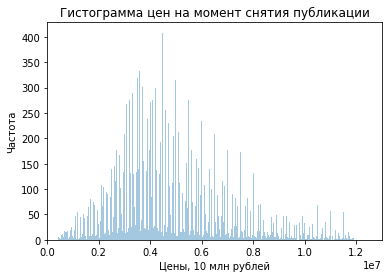

In [55]:
sns.distplot(x=data['last_price'], bins=450,  kde=False,)
plt.xlim(0, 13000000)
plt.title('Гистограмма цен на момент снятия публикации')
plt.xlabel('Цены, 10 млн рублей')
_ = plt.ylabel('Частота')

Цена на квартиры лежит в промежутке от 2 до 12 млн. Большая часть квартир продается за цену в промежутке между 4 и 5 млн. 

**Число комнат**

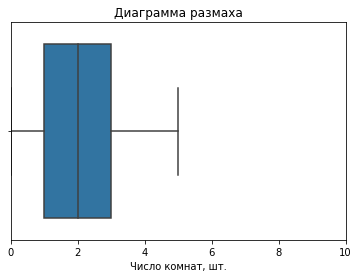

In [31]:
df_whiskers('rooms')

data['rooms'].describe()

sns.boxplot(x=data['rooms'])
plt.title('Диаграмма размаха')
plt.xlabel('Число комнат, шт.')
_ = plt.xlim(0, 10)


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


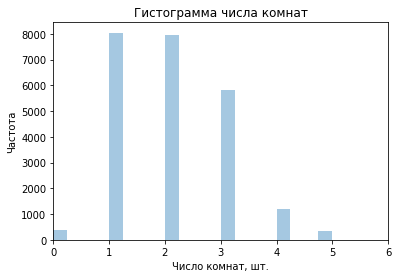

In [32]:
print('  ')
sns.distplot(x=data['rooms'], kde=False, bins=20)
plt.xlim(0, 6)
plt.title('Гистограмма числа комнат')
plt.xlabel('Число комнат, шт.')
_ = plt.ylabel('Частота')

Большинство квартир имеют 1 или 2 комнаты, чуть меньший процент имеют 3 комнаты и небольшое количество - 4. Есть и квартиры, имеющие больше комнат, но их значительно меньше.

Квартиры-студии входят в общее количество однокомнатных квартир. 

**Высота потолков**


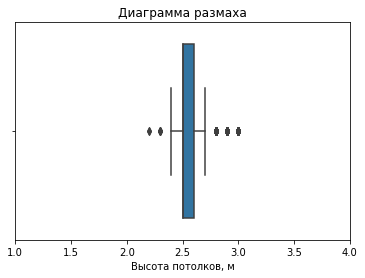

In [33]:
df_whiskers('ceiling_height')

data['ceiling_height'].describe()

sns.boxplot(x=data['ceiling_height'])
plt.title('Диаграмма размаха')
plt.xlabel('Высота потолков, м')
_ = plt.xlim(1, 4)


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


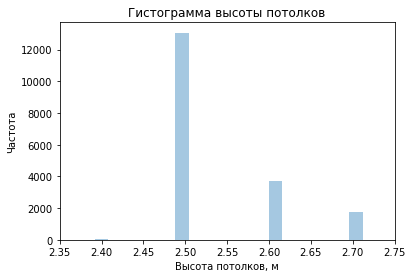

In [34]:
sns.distplot(data['ceiling_height'], kde=False, bins=50,)
plt.xlim(df_whiskers('ceiling_height')[0], df_whiskers('ceiling_height')[1])
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков, м')
_ = plt.ylabel('Частота')

Квартиры в основном имеют потолки от 2,4 до 2,9 м. Преобладает вариант с потолками 2.5 м

**Срок продажи квартиры**

[1.0, 300.0]


count    21364.000000
mean       113.181333
std         96.807439
min          1.000000
25%         45.000000
50%         95.000000
75%        147.000000
max        429.000000
Name: days_exposition, dtype: float64

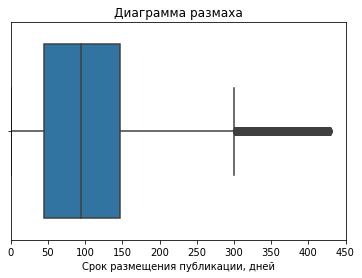

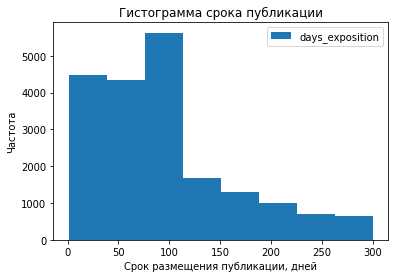

In [35]:
print(df_whiskers('days_exposition'))

sns.boxplot(x=data['days_exposition'])
plt.title('Диаграмма размаха')
plt.xlabel('Срок размещения публикации, дней')
_ = plt.xlim(0, 450)

data.plot(y='days_exposition', 
          kind='hist',  
          range=(df_whiskers('days_exposition')[0], df_whiskers('days_exposition')[1]), 
          bins=8)
plt.title('Гистограмма срока публикации')
plt.xlabel('Срок размещения публикации, дней')
_ = plt.ylabel('Частота')

data['days_exposition'].describe()


Как правило, продажа недвижимости занимала около 3 месяцев (85-100 дней) с медианным значением 95 дней при среднем значении в 169 дней за счет длительно активных объявлений. При этом значительная часть всех объектов недвижимости была продана в течение первых двух месяцев(до 80-85) дней с момента публикации. Если объект был продан в течение первого месяца и меньше со дня публикации(например, имеющийся 1 день), стоит обратить внимание на сделку с целью исключения случаев мошенничества или других сомнительных предприятий.  Кроме того, если объект был продан только после 14 месяцев (428 дней и больше) с момента публикации, это говорит об аномально долгой продаже, неплохо было бы установить причину.

Выведем на экран общую матрицу графиков по изучаемым параметрам(площадь, цена, число комнат, высота потолков) для наглядности распределения величин между собой. 


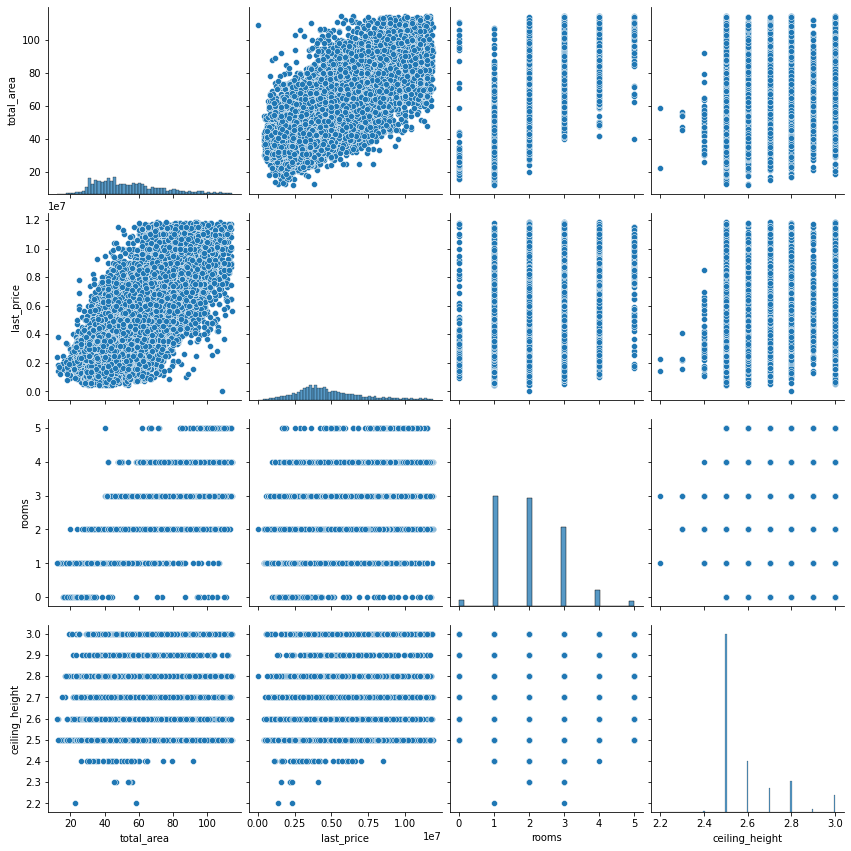

In [36]:
print('Выведем на экран общую матрицу графиков по изучаемым параметрам(площадь, цена, число комнат, высота потолков) для наглядности распределения величин между собой. ')
_ = sns.pairplot(data, 
                 vars=['total_area', 'last_price', 'rooms', 'ceiling_height'],
                 height=3)

<h3> Факторы, влияющие на стоимость квартиры</h3>

**Зависимость цены от площади квартиры и от расстояния до центра города**

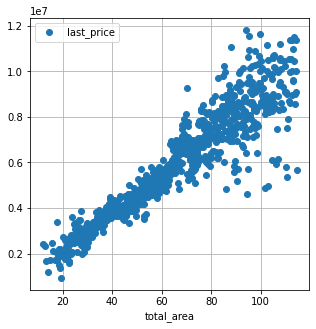

Корреляция цены и площади: 

            last_price  total_area
last_price    1.000000    0.905255
total_area    0.905255    1.000000 



In [37]:
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

Чем больше площадь, тем выше стоимость. Корреляция этих параметров крайне высокая. 

**Зависимость цены от числа комнат**

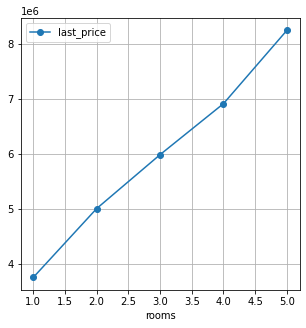

Корреляция цены и числа комнат: 

            last_price     rooms
last_price    1.000000  0.538349
rooms         0.538349  1.000000 



In [38]:
(
    data.query('rooms > 0').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')



Число комнат влияет на цену (больше комнат - больше цена), однако зависимость ниже, чем у площади. Можно сделать  вывод, что на цену влияют и другие факторы, в частности, площадь комнаты, удаленность от центра.

**Зависимость цены от удалённости от центра**

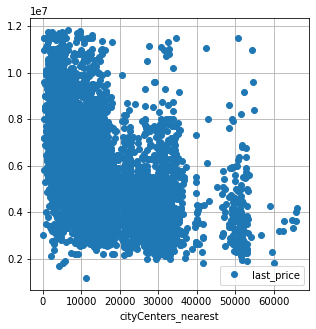

Корреляция цены и удалённости от центра: 

                     cityCenters_nearest  last_price
cityCenters_nearest             1.000000    0.835702
last_price                      0.835702    1.000000 



In [39]:
(
    data.pivot_table(index='cityCenters_nearest', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и удалённости от центра:','\n')
print(data.pivot_table(index='floor', values=['cityCenters_nearest', 'last_price']).corr(),'\n')





Самые дорогие варианты квартир находятся в центре города, однако в центре также есть и дешёвые варианты.



**Зависимость цены от этажа**

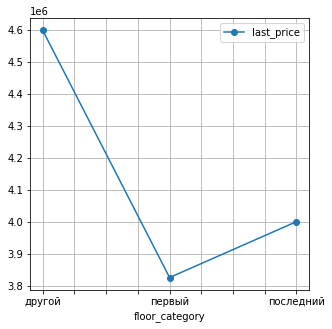

In [40]:
(
    data.pivot_table(index='floor_category', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.


**Зависимость цены за квадрат от площади**

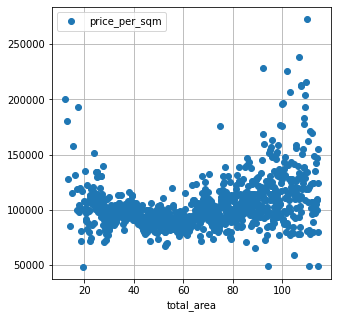

Корреляция цены за квадрат и площади: 

               price_per_sqm  total_area
price_per_sqm       1.000000    0.049375
total_area          0.049375    1.000000 



In [41]:
(
    data.pivot_table(index='total_area', values='price_per_sqm')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены за квадрат и площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'price_per_sqm']).corr(),'\n')



Чем больше площадь, тем выше цена за квадрат, но так же сохраняются усредненные значения цены за квадратный метр. Присутствуют как завышенные относительно среднего, так и заниженные цены в краевых зонах распределения. Можно сделать вывод, что кроме среднерыночной стоимости  квадратного метра есть и другие определяющие цену характеристики. В данном случае, вероятней всего элитность жилплощади и месторасположение.

**Зависимость цены за квадрат от числа комнат**

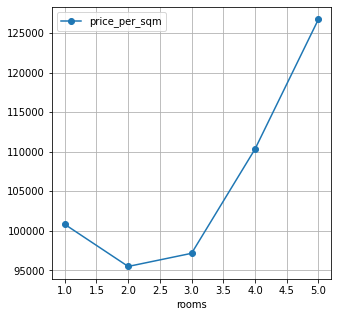

Корреляция цены за квадрат и числа комнат: 

               price_per_sqm     rooms
price_per_sqm       1.000000 -0.259323
rooms              -0.259323  1.000000 



In [42]:
(
    data.query('rooms > 0').pivot_table(index='rooms', values='price_per_sqm')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены за квадрат и числа комнат:','\n')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'price_per_sqm']).corr(),'\n')

Цена за квадрат выше у однокомнатных квартир и квартир с 4 и 5 комнатами. Вероятно, такие однокомнатные квартиры имеют удачное расположение или, вместе с многокомнытными, - элитное жилье.

**Зависимость от дня размещения**

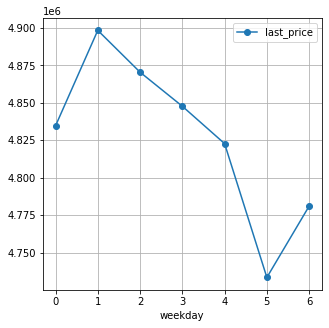

In [43]:
(
    data.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()


Дороже всего квартиры, опубликованные в среду, дешевле всего - в субботу.

**Зависимость от месяца размещения**

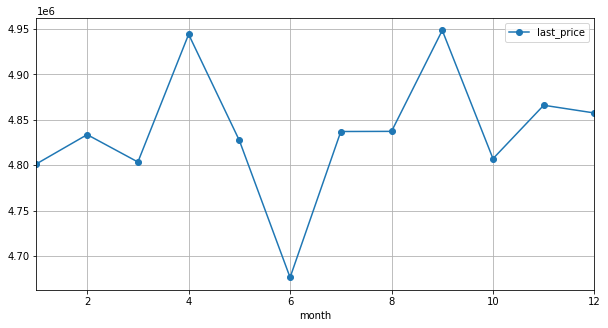

In [44]:
(
    data.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()



Дороже всего квартиры, продающиеся с апреля, дешевле всего - с июня.


**Зависимость от года размещения**

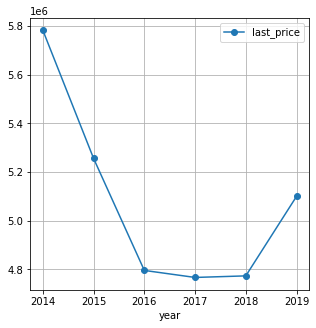

In [45]:
(
    data.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Квартиры очень сильно подешевели в 2016-2018 годах, что, вероятно, вызвано некоторым экономическим кризисом. В 2019 году цены снова стали повышаться из-за положительного течения экономических процессов.

**Сравнение средней стоимости квадратного метра в топ-10 городов**

In [46]:
city_ten = data['locality_name'].value_counts().head(10)
city_sm_price = data.query('locality_name in (@city_ten.index)').pivot_table(values='price_per_sqm', index='locality_name')
city_sm_price = city_sm_price.astype(int)
city_sm_price.sort_values('price_per_sqm', ascending=False)

,price_per_sqm
locality_name,
Санкт-Петербург,114785
Пушкин,103125
деревня Кудрово,92471
посёлок Парголово,90177
посёлок Мурино,85752
посёлок Шушары,78677
Колпино,75424
Гатчина,68746
Всеволожск,68655


Наибольшая средняя стоимость квадратного метра в Санкт-Петербурге. Затем идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкающие(например, Пушкин). Из топ-10 наименьшая стоимость в ГатчинеБ Выборге и Всеволожске из-за их расположенния на большом расстоянии от Санкт-Петербурга.


**Определяем границу центральной зоны**

Добавляем столбец с расстоянием до центра в км, округляем до целого.
Выбираем Санкт-Петербург, смотрим на график, где указана средняя стоимость для каждого км


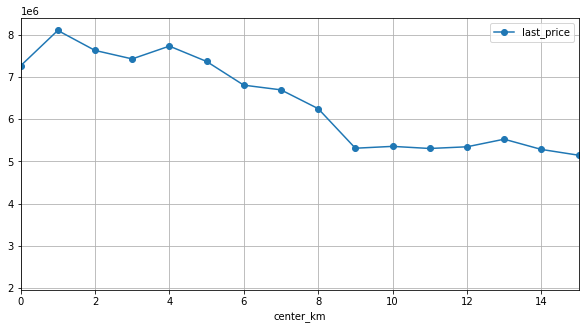

Судя по получившемуся графику, центральная зона - это 8 км и меньше. Дальше 8 км средняя цена на квартиры резко снижается.


In [47]:
print('Добавляем столбец с расстоянием до центра в км, округляем до целого.')
data['center_km'] = data['cityCenters_nearest'] / 1000
data['center_km'] = data['center_km'].fillna(value=0).astype(int)
print('Выбираем Санкт-Петербург, смотрим на график, где указана средняя стоимость для каждого км')
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='center_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.show()

print('Судя по получившемуся графику, центральная зона - это 8 км и меньше. Дальше 8 км средняя цена на квартиры резко снижается.')



**Анализ сегмента в центре**

Изучаем площадь.
Площадь (медиана): 52 

Площадь в центре (медиана): 66 

Площадь (среднее): 57 

Площадь в центре (среднее): 67 



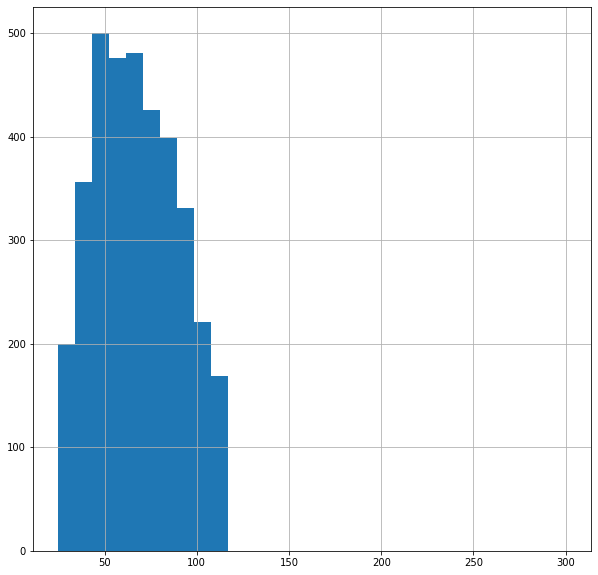

Площадь квартир в центре значительно больше, чем в целом по городу - в среднем на 13-14 метров. Также в центре находится большое число квартир с огромной площадью (100 квадратных метров и более).
Далее выводим стоимость.
Число вариантов с ценой больше 20 млн: 0


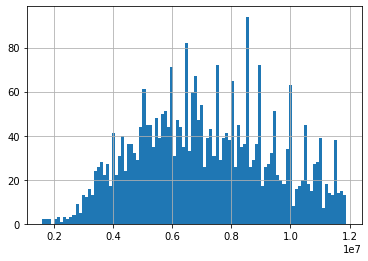

  
Изучаем число комнат. 


,count,rooms_ratio,center_count,center_rooms_ratio,center_cap
rooms,,,,,
1,4948,31.976218,584,16.159380,12.0
2,5122,33.100685,1125,31.128943,22.0
3,4140,26.754556,1176,32.540122,28.0
4,973,6.287967,508,14.056447,52.0
5,291,1.880574,221,6.115108,76.0


 В центре в два раза ниже доля однокомнатных квартир (16 %), чем в среднем по городу (32 %). Половина четырёхкомнатных квартир находится в центре города (52 %), их доля в два раза выше, чем в среднем по городу (6 %). Большинство квартир с 5 комнатами и более находятся в центре города.
  
Изучаем высоту потолков. 
Высота потолков (медиана): 2.5 

Высота потолков в центре (медиана): 2.5 

Высота потолков (среднее): 2.61 

Высота потолков в центре (среднее): 2.66 

 Высота потолков в центре выше. 
  


In [48]:
 
spb_center = data.query('(locality_name == "Санкт-Петербург") & (center_km <= 8)')

print('Изучаем площадь.')
print('Площадь (медиана):', round(data.query('locality_name == "Санкт-Петербург"')['total_area'].median()),'\n')
print('Площадь в центре (медиана):', round(spb_center['total_area'].median()),'\n')
print('Площадь (среднее):', round(data.query('locality_name == "Санкт-Петербург"')['total_area'].mean()),'\n')
print('Площадь в центре (среднее):', round(spb_center['total_area'].mean()),'\n')
spb_center['total_area'].hist(bins=30, range=(25,300), figsize=(10,10))
plt.show()
print('Площадь квартир в центре значительно больше, чем в целом по городу - в среднем на 13-14 метров. Также в центре находится большое число квартир с огромной площадью (100 квадратных метров и более).')
print('Далее выводим стоимость.')
spb_center['last_price'].hist(bins=100)
print('Число вариантов с ценой больше 20 млн:', spb_center.query('last_price > 20000000')['last_price'].count())
plt.show()
print('  ')
print('Изучаем число комнат. ')
spb_rooms = data.query('(locality_name == "Санкт-Петербург") & (rooms > 0)').pivot_table(index='rooms', values='floor', aggfunc='count')
spb_rooms.columns = ['count']
spb_rooms['rooms_ratio'] = spb_rooms['count'] / spb_rooms['count'].sum() * 100
spb_rooms_center = data.query('(locality_name == "Санкт-Петербург") & (center_km <= 7)  & (rooms > 0)').pivot_table(index='rooms', values='floor', aggfunc='count')
spb_rooms_center.columns = ['center_count']
spb_rooms_center['center_rooms_ratio'] = spb_rooms_center['center_count'] / spb_rooms_center['center_count'].sum() * 100
rooms_alldata = pd.merge(spb_rooms, spb_rooms_center, 'left', on = 'rooms')
rooms_alldata['center_cap'] = round(rooms_alldata['center_count'] / rooms_alldata['count'] * 100)
display(rooms_alldata)
print(' В центре в два раза ниже доля однокомнатных квартир (16 %), чем в среднем по городу (32 %). Половина четырёхкомнатных квартир находится в центре города (52 %), их доля в два раза выше, чем в среднем по городу (6 %). Большинство квартир с 5 комнатами и более находятся в центре города.')
print('  ')
print('Изучаем высоту потолков. ')
print('Высота потолков (медиана):', data.query('locality_name == "Санкт-Петербург"')['ceiling_height'].median().round(2),'\n')
print('Высота потолков в центре (медиана):', spb_center['ceiling_height'].median().round(2),'\n')
print('Высота потолков (среднее):', data.query('locality_name == "Санкт-Петербург"')['ceiling_height'].mean().round(2),'\n')
print('Высота потолков в центре (среднее):', spb_center['ceiling_height'].mean().round(2),'\n')
print(' Высота потолков в центре выше. ')
print('  ')

**Зависимость цены от числа комнат**

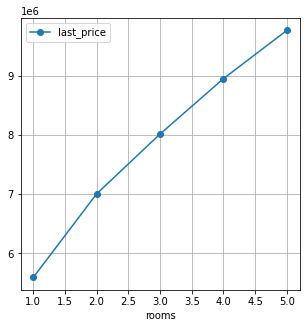

Корреляция цены и числа комнат: 

            last_price     rooms
last_price    1.000000  0.166072
rooms         0.166072  1.000000 



In [49]:
(
    spb_center.query('(rooms > 0) & (rooms < 7)').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(spb_center.query('(rooms > 0) & (rooms < 7)').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')


Зависимость цены квартиры от числа комнат в центре такая же, как и в целом по городу


**Зависимость цены от этажа**

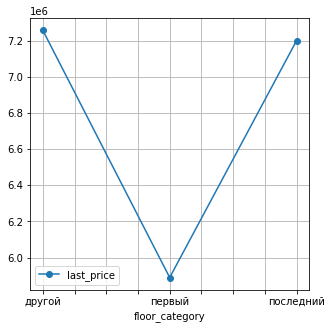

In [50]:
(
    spb_center.pivot_table(index='floor_category', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()



В центре верхний этаж стоит практически столько же, сколько и другие этажи, кроме первого. Вероятно, первый значительно дешевле из-за большего количества прохожих в центре по сравнению со спальными районами.


**Зависимость цены от удалённости от центра**

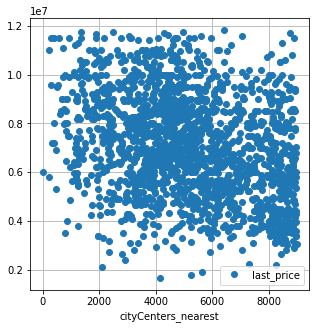

Корреляция цены и удалённости от центра: 

                     cityCenters_nearest  last_price
cityCenters_nearest             1.000000   -0.076306
last_price                     -0.076306    1.000000 



In [51]:
(
    spb_center.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='median')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и удалённости от центра:','\n')
print(spb_center.pivot_table(index='floor', values=['cityCenters_nearest', 'last_price']).corr(),'\n')


В центральной зоне почти нет зависимости от удалённости от центра города. Стоимость даже немного повышается при удалении от центра - вероятно, это связано с расположением точки, которая является формальным центром города.


**Зависимость от дня и месяца размещения**

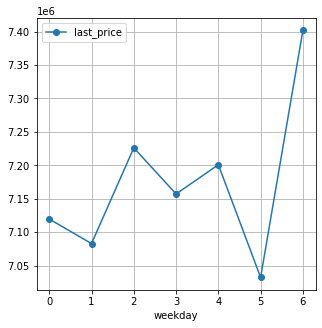

In [52]:
(
    spb_center.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()


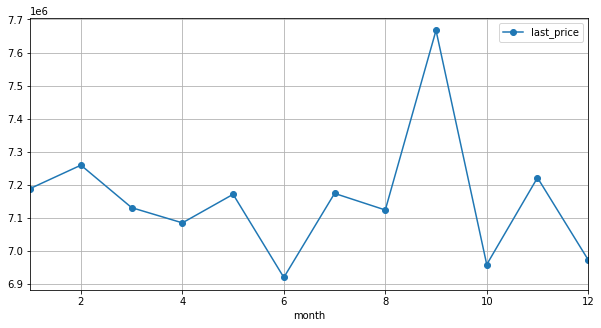

In [53]:
(
    spb_center.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()


В центре значительно выше стоимость квартир, опубликованных в субботу и в декабре.

**Зависимость от года размещения**

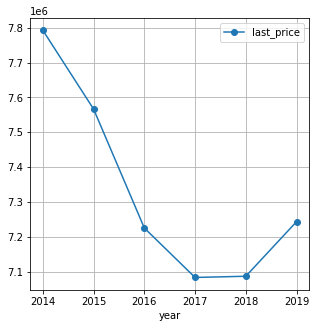

In [54]:
(
    spb_center.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()


Стоимость квартир в центре значительно выросла в 2015 году и снизилась только в 2017 году. Это сложно объяснить, т.к. стоимость менее элитной недвижимости упала после  2014 году

## Общий вывод

Целью данного исследования стал поиск зависимостей стоимости жилья в Ленобласти от различных характеристик квартир, а так же анализ предложений на рынке недвижимости по различным характеристикам за определенный длительный отрезок времени. В заключении требуется сделать вывод и предоставить рекомендации на основании полученных данных.

В начале была произведена подготовка предоставленного архива к дальнейшей работе. Были заполнены пропуски логически обоснованными значениями, при необходимости изменены типы данных в столбцах, а так же числовые значения были приведены в удобоваримый вид. Далее были проведены необходимые для анализа расчеты, результаты которых были добавлены в таблицу. Были убраны выбросы. Особый акцент был сделан на визуализации данных. Были сформированы иллюстрирующие полученные зависимости диаграммы и графики. Поэтапно были сделаны выводы.
<ul> <b>На основании проделанного анализа можно сформулировать следующиевыводы:</b>
 <li> Сильнее всего на стоимость жилья влияет его площадь (коэфф. корреляции 0,68);</li>
 <li> так же, значительно влияет расстояние до центра города, но обратно пропорционально и не так сильно, как площадь (коэфф. корреляции -0,31); </li> 
    <li>Стоимость квартиры зависит от числа комнат - чем их больше, тем стоимость выше. Однако, есть исключения, и однокомнатная квартира может стоить выше среднего в своем сегменте(наблюдается в центре города), что, вероятно, связано с площадью комнаты и расположением. Так же, наблюдаются сложности с продажей квартир, комнат в которых больше 4. Вероятно, это связано со спросом на подобное жилье;</li> 
    <li>Квартиры на первом и последнем этажах продаются дешевле прочих, однако, квартиры на последних этажах в центре по стоимости не отличаются от среднего в этом районе. Вероятно, из-за малоэтажности и элитности жилья в центре;  </li>
    <li>На основании имеющихся данных нельзя сказать, влияют ли на стоимость жилья день недели и месяц  размещения объявления о продаже. Можно сделать только косвенные предположения. Однако, обнаружена зависимость, что логично, между экономической обстановкой в год публикации объявления и стоимостью квадратного метра. Однако, экономическая обстановка почти не влияет на ценообразование жилья в центре; </li>
    <li>Среди населенных пунктов из десяти самых распространенных наиболее дорогое жилье в г. Санкт-Петербурге, а так же в его ближайшей периферии(Пушкин, Кудрово, Парголово), дешевле жилье в более отдаленных от Петербурга Всеволжске и Выборге;  </li>
    <li>В среднем, сроки продажи квартиры(если судить по длительности размещения объвления) составляет 95 дней, т е около 3 месяцев. Однако, встречаются и нереалистично малое количество дней, и нереалистично большое. Что может быть связано с неадекватными условиями продажи, невостребованностью нестандартной жилплощади - в случае с "застоявшимися" предложениями. Или же, с вероятной нечестностью сделок, что так же требует проверки;   </li>
   
</ul>
<ul> <b>Исходя из выводов можно сформулировать следующие рекомендации:</b> 
     <li> Возможно, с целью возможности более подробного исследования стоит расширить "опросник" объявления, добавив пункты о площади комнат, информации о санузле(раздельный, совмещенный и т д), отягощении сделки, состоянии дома, доступности прочей инфраструктуры, кроме аэропорта. Можно было бы добавить данные, была ли продажа организована риэлтором или же человек занимался всем самостоятельно и как этот момент повлиял на сделку;</li>
     <li>Рекомендуется проверять информацию о "быстрых" сделках и их участниках, и наоборот, о длительно размещенных объявлениях - не  являются ли они "мертвыми душами" или же не нужна ли их автору консультация риэлтора для корректировки требований;  </li>
   
   
    
</ul>